In [1]:
%load_ext autoreload
%autoreload 2
import sys
import collections
import numpy as np
import re
import os
# sys.path.append("/private/home/alexandrerame/domainbedv2/")
sys.path.append("/Users/alexandrerame/code_repository/dataplace/data/logs_experiments_notebook")
sys.path.append("/Users/alexandrerame/code_repository/codedev/domainbedv2")

# sys.path.append("/home/rame/domainbedv2/")
from domainbed.codeplot import plot
plot.plt.style.use('default')
# sys.path.append("/data/rame/logs_experiments_notebook/nlp")
from matplotlib import rc

rc('text', usetex=True)
plot.plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]
plot.plt.rcParams['text.usetex'] = True
plot.plt.rcParams['font.family'] = 'serif'


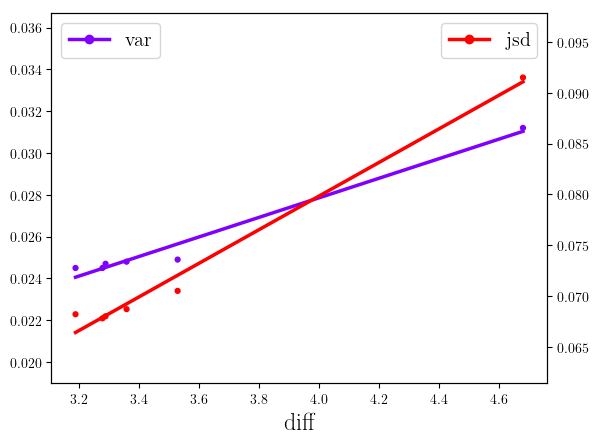

In [14]:
d = plot.plot_basic_scatter(l, key_x="diff", keys_y=["var", "jsd"], keys_y_2=["jsd"], order="1", loc="upper left")

In [2]:
dict_key_to_minmax_fts_val = {
    'ROUGE_L': [0.5994, 0.6059, 0.00649999999999995],
    'Bleu_1': [0.7838, 0.8321, 0.0482999999999999],
    'tristan': [1.0885338198859245, 1.7681593088805676, 1.7681593088805676 -1.0885338198859245],
    'cogd': [-1.787040968928486, 0.8321, -0.4441262733377516 - 0.35395207181572913 +1.787040968928486],
}


def normalize_val(l, key):
    return l[key]
    # return (l[key] - dict_key_to_minmax_fts_val[key][0]) / dict_key_to_minmax_fts_val[key][2]


In [9]:
# import data_summarynews_val as data_captioning_val
import data_summary_val as data_captioning_val
key1 = "tristan"
key2 = "cogd"

In [15]:
import data_captioning_val


key1 = "Bleu_1"
key2 = "ROUGE_L"


In [16]:
def get_l_at_lambda(l, lamda):
    for ll in l:
        if ll["lambda"] == lamda:
            return ll
    raise ValueError("Lambda not found")

In [17]:
def compute_score_ll(ll, hatmu):
    score = (1-hatmu) * normalize_val(ll, key1) + hatmu * normalize_val(ll, key2)
    return score

def compute_score(l, hatmu):
    scores = [compute_score_ll(ll, hatmu) for ll in l]
    return max(scores)

def compute_meanscore(l, len_hatmus=100, verbose=False):
    hatmus = np.linspace(0, 1, len_hatmus)
    score = 0
    for hatmu in hatmus:
        new_score = compute_score(l, hatmu)
        if verbose:
            print(hatmu, new_score)
        score += new_score
    return score/len_hatmus

import itertools
def compute_meanscore_m(m, l, **kwargs):
    scores = []
    for subset in itertools.combinations(range(len(l)), m):
        subl = [ll for i, ll in enumerate(l) if i in subset]
        scores.append(compute_meanscore(subl, **kwargs))
    return mean(scores)


def compute_meanscore_b(m, l, **kwargs):
    scores = []
    for subset in itertools.combinations(range(len(l)), m):
        subl = [ll for i, ll in enumerate(l) if i in subset]
        scores.append(compute_meanscore(subl, **kwargs))
    return max(scores)

In [18]:
score_wa = compute_meanscore(data_captioning_val.l_wa, 1000, verbose=0)

data_captioning_val.l_multi_clean = [
    get_l_at_lambda(data_captioning_val.l_multi, lamda=lamda) for lamda in [
        0.5,
        0.3,
        0.7,
        0.1,
        0.9,
        0.4,
        0.6,
        0.0,
        1.0,
        0.2,
        0.8,
    ]
]


In [19]:
l_m_gain = [
    {
        "M":
        m,
        "gain":
        score_wa -
        compute_meanscore_m(m, l=data_captioning_val.l_multi_clean, len_hatmus=1000, verbose=0),
        # "gainbest":
        # score_wa -
        # compute_meanscore_b(m, l=data_captioning_val.l_multi_clean, len_hatmus=1000, verbose=0),
    } for m in range(1, 12)
]

# l_m_gain = [
#     {
#         "M":
#         m,
#         "gain":
#         score_wa -
#         compute_meanscore(l=data_captioning_val.l_multi_clean[:m], len_hatmus=1000, verbose=0)
#     } for m in range(1, 12)
# ]

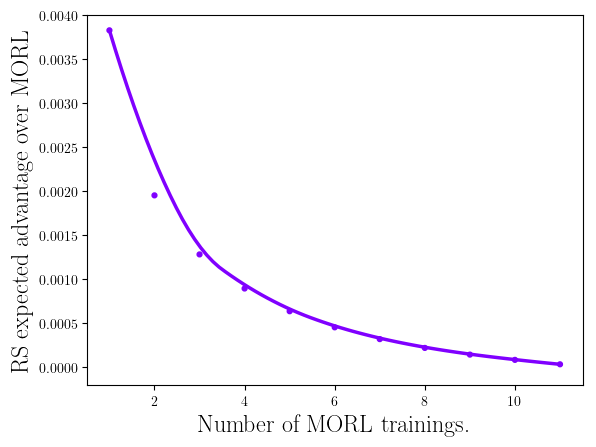

In [20]:
fig_dr = plot.plot_basic_scatter(
    l_m_gain, key_x="M", keys_y=["gain"], order="savgol_3_1_quadratic", loc="no", y_axis_name="RS expected advantage over MORL", _dict_key_to_label={"M": "Number of MORL trainings."},
    _dict_key_to_limit={"y": [-0.0002, 0.004]}
)

plot.save_fig(fig=fig_dr, name="captioning/gain_captioning.pdf", do_save=True)

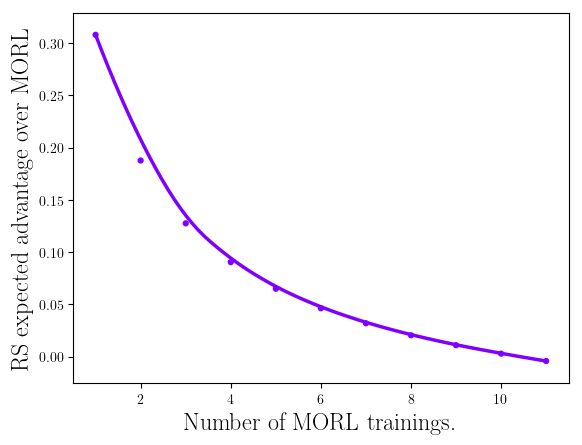

In [14]:
fig_dr = plot.plot_basic_scatter(
    l_m_gain,
    key_x="M",
    keys_y=["gain"],
    order="savgol_3_1_quadratic",
    loc="no",
    y_axis_name="RS expected advantage over MORL",
    _dict_key_to_label={"M": "Number of MORL trainings."},
    # _dict_key_to_limit={"y": [-0.0034, 0.0002]}
)

# plot.save_fig(fig=fig_dr, name="captioning/rebutalgain.pdf", do_save=True)
plot.save_fig(fig=fig_dr, name="nlp/gain_reddit.pdf", do_save=True)

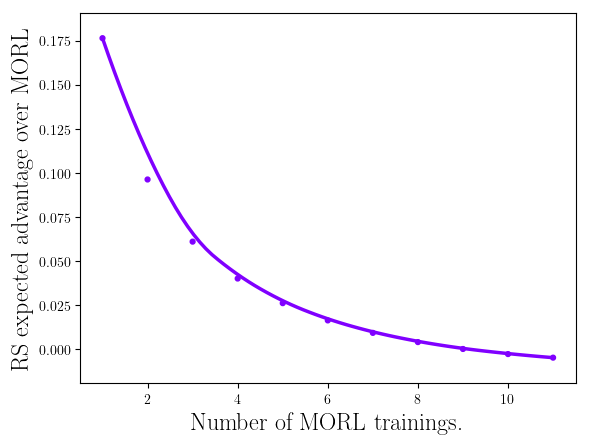

In [8]:
fig_dr = plot.plot_basic_scatter(
    l_m_gain, key_x="M", keys_y=["gain"], order="savgol_3_1_quadratic", loc="no", y_axis_name="RS expected advantage over MORL", _dict_key_to_label={"M": "Number of MORL trainings."},
    # _dict_key_to_limit={"y": [-0.0034, 0.0002]}
)

# plot.save_fig(fig=fig_dr, name="captioning/rebutalgain.pdf", do_save=True)
plot.save_fig(fig=fig_dr, name="nlp/gain_news.pdf", do_save=True)

In [ ]:
data_captioning_val.l_multi_clean[:2]

In [ ]:
print(len(data_captioning_val.l_wa))
print(len(data_captioning_val.l_multi))

In [ ]:
hatmus = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]


def normalize_val(l, key):
    return l[key]

In [ ]:
dict_colormaps = plot.create_colormaps()
cmap_redpurpleblue = plot.matplotlib.colors.LinearSegmentedColormap.from_list(
    "", [
        plot.get_color_from_cmap("Reds", dict_colormaps),
        plot.get_color_from_cmap("Purples", dict_colormaps),
        plot.get_color_from_cmap("Blues", dict_colormaps)
    ]
)

In [ ]:
l_wableurouge_hatmus = [
    [
        {
            "hatmu": hatmu,
            "bleurougehatmu":
            hatmu * normalize_val(l, "ROUGE_L") + (1 - hatmu) * normalize_val(l, "Bleu_1")
        } for hatmu in hatmus
    ] for i, l in enumerate(data_captioning_val.l_wa)
]


l_wableurouge_hatmus.append(
    [
        {
            "hatmu": hatmu,
            "bleurougehatmu":
            l_wableurouge_hatmus[int(10 * hatmu)][int(10 * hatmu)]["bleurougehatmu"]
        } for hatmu in hatmus
    ]
)

l_wableurouge_hatmus.append(
    [
        {
            "hatmu":
            hatmu,
            "bleurougehatmu":
            # max(
            #     [
            #         l_wableurouge_hatmus[i][int(10 * hatmu)]["bleurougehatmu"]
            #         for i in range(len(l_wableurouge_hatmus))
            #     ]
            # )
            l_wableurouge_hatmus[
                int(10 * data_captioning_test.l_multi[np.argmax(ltest_wa_hatmu[hatmu])]["lambda"])]
            [int(10 * hatmu)]["bleurougehatmu"]
        } for hatmu in hatmus
    ]
)
labels_wableurouge_hatmus = [
    # r"$\lambda$=" +
    str(l["lambda"]) for i, l in enumerate(data_captioning_val.l_wa)
]
labels_wableurouge_hatmus.append(r"$\hat{\mu}$")
labels_wableurouge_hatmus.append(r"CV $\lambda$")
clean_kwargs_hatmu = {
    "loc": "lower right",
    "order": "onlyconnect",
    "title": None,
    "_dict_key_to_label": {
        "1-lambda": r'$\lambda$',
        "bleurougehatmu": r"$(1-\hat{\mu})\times BLEU1_{Norm} + \hat{\mu}\times ROUGE_{Norm}$",
        "lambda": r'$\lambda$',
        "METEOR": "METEOR",
        "CIDEr": "CIDEr",
        "hatmu": r"$\hat{\mu}$"
    }
}
len_labels = len(labels_wableurouge_hatmus) - 2
colors_hatmu = [
    plot.cm.get_cmap(cmap_redpurpleblue)((len_labels - 1 - i) / (len_labels - 1))
    for i in range(len_labels)
]

In [ ]:
def plot_multiple_l(
    ls,
    key_x,
    key_y,
    order=1,
    labels=None,
    colors=None,
    linestyles=None,
    linewidths=None,
    _dict_key_to_label="def",
    loc="upper right",
    legendtitles=None,
    title=None,
    fig=None,
    fontsize=None,
    kwargs={}
):
    if fig is None:
        fig, ax1 = plot.plt.subplots()
    else:
        ax1 = plot.plt.gca()
    plot.plt.xlabel(_dict_key_to_label.get(key_x, key_x), fontsize=plot.SIZE_AXIS)
    plot.plt.ylabel(_dict_key_to_label.get(key_y, key_y), fontsize=plot.SIZE_AXIS)

    def plot_with_int(ll, color, colormap, label, marker, linestyle, linewidth, key_y, ax, kwargs):
        t = plot.get_x(ll, key_x)
        if t == []:
            return
        plot.interpolate_points(
            plot.get_x(ll, key_x),
            plot.get_x(ll, key_y),
            order=order,
            ax=ax,
            label=label,
            color=color,
            marker=marker,
            linewidth=linewidth,
            linestyle=linestyle,
            kwargs=kwargs
        )
        kwargs["color"] = color

        if order not in ["onlyfit1", "onlyconnect"]:
            ax.scatter(
                plot.get_x(ll, key_x),
                plot.get_x(ll, key_y),
                label=None if order != "nofit" else label,
                marker=marker,
                **kwargs
            )

    for i, l in enumerate(ls):
        ilinestyle = linestyles[i]
        ilinewidth = linewidths[i]
        for index in range(len(l)):
            label = labels[i][index]
            kwargs_copy = {k: v for k, v in kwargs.items()}
            if index == (len(l) - 2):
                linewidth = 4
                linestyle = "dashed"
            elif index == (len(l) - 1):
                linewidth = 4
                linestyle = "solid"
            else:
                linewidth = ilinewidth
                linestyle = ilinestyle
            plot_with_int(
                l[index],
                color=colors[i][index],
                colormap=None,
                label=label,
                marker=None,
                linewidth=linewidth,
                linestyle=linestyle,
                key_y=key_y,
                ax=ax1,
                kwargs=kwargs_copy
            )

    if loc != "no":
        fontsize = fontsize or plot.SIZE
        # Get the handles and labels from the legend
        ax1.legend(
            loc='lower right',
            # bbox_to_anchor=(0, 1.02, 1, 0.2),
            ncol=2,
            fontsize=fontsize,
            handlelength=2,
            title=legendtitles[0],
            labelspacing=0.1,
        )
    if title:
        ax1.title(title, fontsize="x-large")
    return fig

In [ ]:


plot.plt.rcParams['legend.title_fontsize'] = 'x-large'
def plot_hatmu_captioning(legendtitles=None, **kwargs):

    plot.plt.rcParams["figure.figsize"] = (6, 6)

    for key in clean_kwargs_hatmu.keys():
        if key not in kwargs:
            kwargs[key] = clean_kwargs_hatmu[key]
    fig_dr = plot_multiple_l(
        ls=[l_wableurouge_hatmus, l_bleurouge_hatmus],
        labels=[labels_wableurouge_hatmus, labels_bleurouge_hatmus],
        key_x="hatmu",
        key_y="bleurougehatmu",
        linestyles=["dashdot", "dotted"],
        colors=[colors_hatmu + ["limegreen", "green"], colors_hatmu + ["yellow", "gold"]],
        legendtitles=legendtitles,
        linewidths=[3, 2],
        fontsize="x-large",
        kwargs={"alpha": 0.7},
        **kwargs
    )
    plot.plt.rcParams["figure.figsize"] = (6, 6)
    return fig_dr


fig_dr = plot_hatmu_captioning(
    legendtitles=[r"RS $\lambda$:" + "\ \ \ \ \ \ \ \ \ \ \ \ \ \ " + r"MORL $\mu$:\ \ \ \ "]
)
plot.save_fig(
    fig=fig_dr, name="captioning/paretohatmu_captioning_bleu1torouge.pdf", do_save=True
)
